# Deep Residual Networks

Increasing the number of layers in CNNs has been observed to increase training errors.

In theory, a deeper model should have at least the same error rate as the shallower counterpart, since the additional layers can perform _identity mapping_ (pass the input to the output without any transformations). In practice, optimization algorithms fail to find the optimal solution when going deeper.

The solution proposed in [Deep Residual Learning for Image Recognition](https://arxiv.org/pdf/1512.03385.pdf) builds upon an assumption that the optimal function being modelled by a block of layers is closer to an identity mapping ($F(x) = x$) of the input than to something that produces completely unrelated output.



_(Left: layers that learn an unreferenced function $H(x)$, right: layers that learn a residual function $F(x)$ with reference to the input)_

Residual networks have _shortcut connections_ (those that skip one or more layers) that perform identity mapping, with their outputs added element-wise to the outputs of skipped layers. These connections introduce no additional parameters to be learned.

Residual functions are learned by two or more layers. If a function is learned by a single layer, $F(x) + x$ becomes $w^T x + x$, for which the authors remark to have observed no advantages compared to a plain layer. Experiments in the paper involve functions that have two or three layers. Layers can be convolutional, in which case "element-wise addition is performed on two feature maps, channel by channel".

## ResNet

Several residual networks were evaluated in the paper:

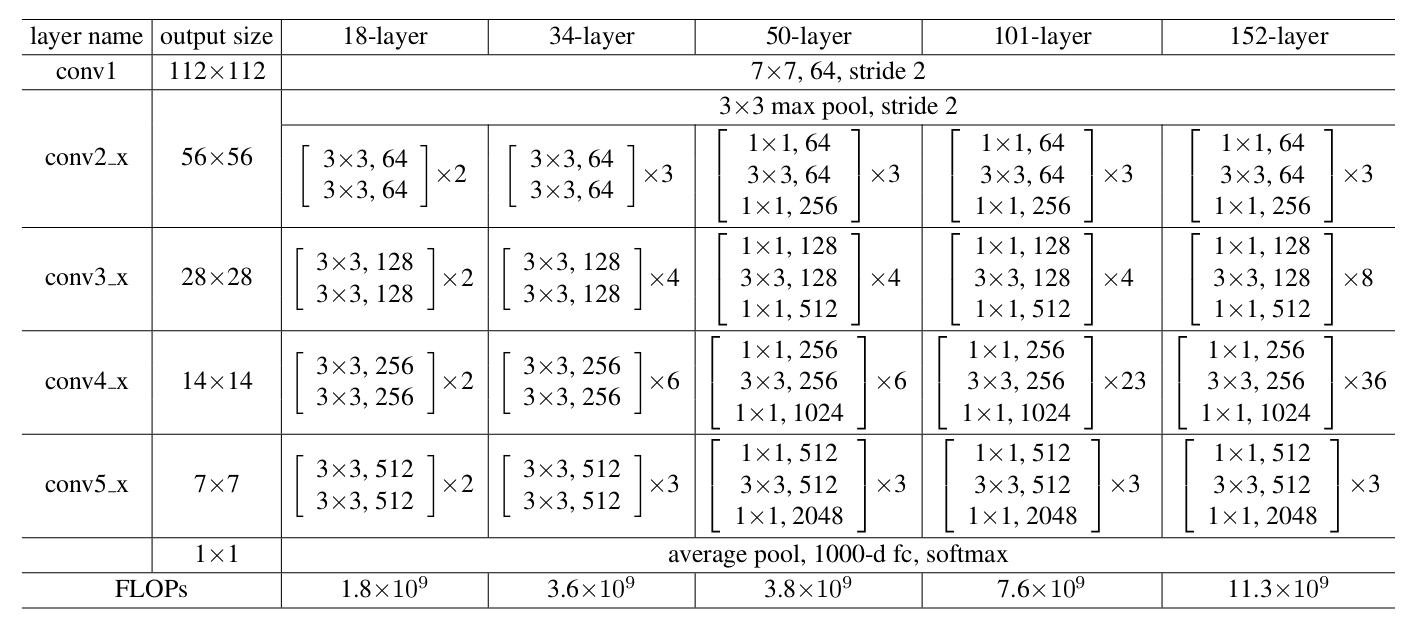

The input is a $224 \times 224$ image. Downsampling is performed by convolution layers with a stride of 2 -- the first layer in the first block of `conv3_x`, the first layer in the first block of `conv4_x`, the first layer in the first block of `conv5_x`.

Deeper networks (50+ layers) use blocks with three instead of two layers, arranged in what the authors call _bottleneck design_. The 1x1 layers are responsible for reducing and then increasing (restoring) dimensions. This leads to smaller dimensions for the 3x3 layer, improving computation time.

### Training

_Batch normalization_ is applied after each convolution (before the activation). Models are trained on batches of 256 images using a _stochastic gradient descent_ with a fixed momentum of 0.9 and an adaptive learning rate that starts at 0.1 and is divided by 10 when the error plateaus. A weight decay of 0.0001 is added for regularization. Dropout is not used.

As an example, here's the 50-layer model in Keras:

In [1]:
import tensorflow as tf

model = tf.keras.applications.ResNet50(weights=None)
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        input_1[0][0]                    
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 112, 112, 64) 0           bn_conv1[0][0]                   
__________________________________________________________________________________________________
max_poolin